In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


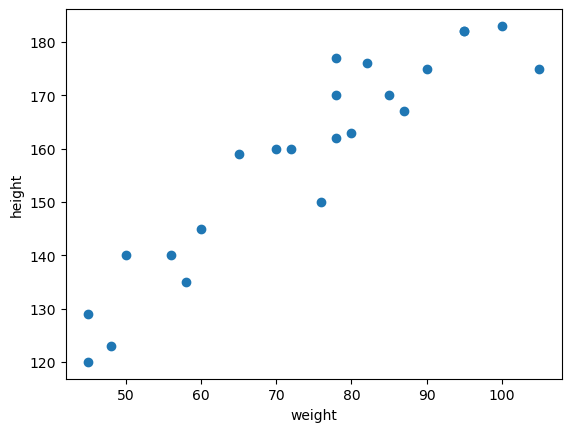

In [4]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

In [5]:
##correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


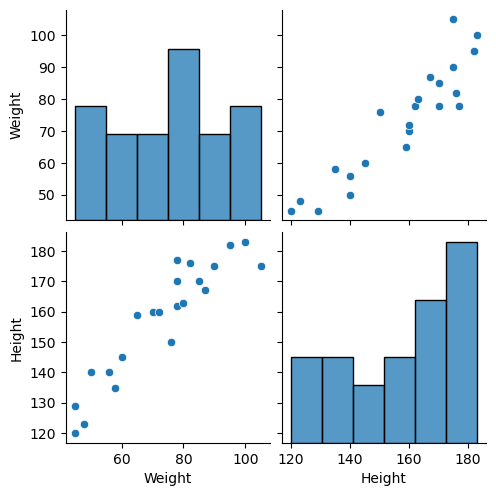

In [6]:
##seaborn for visualization
import seaborn as sns
sns.pairplot(df)
plt.show()

In [7]:
#independent and dependent
x=df[['Weight']]
y=df['Height']

In [8]:
##train test split
from sklearn.model_selection import train_test_split


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [10]:
##standardization
from sklearn.preprocessing import StandardScaler


In [11]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_train
x_test = scaler.transform(x_test)
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [12]:
##apply simple linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(x_train,y_train)
print("The slope or coefficient of weight is ",regression.coef_)
print("Intercept:",regression.intercept_)

The slope or coefficient of weight is  [17.2982057]
Intercept: 156.47058823529412


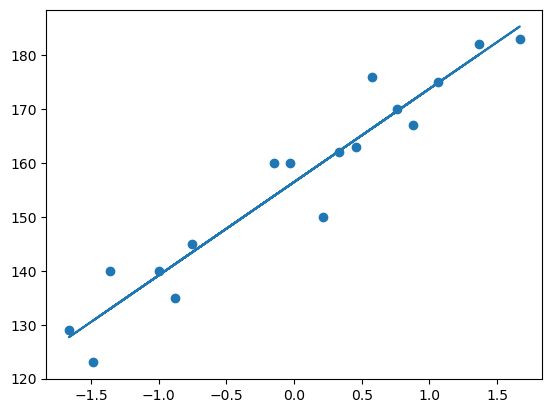

In [13]:
#plot training data plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))
plt.show()

In [14]:
y_pred=regression.predict(x_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [15]:
##performance metrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [16]:
##r square
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [17]:
## R adjusted r2
1 -  ( (1-score)*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1))

0.6041240076971914

In [18]:
##ols linear regression
import statsmodels.api as sm
model= sm.OLS(y_train,x_train).fit()

prediction = model.predict(x_test)
print(prediction)
print(model.summary())

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]
                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 05 Jul 2025   Prob (F-statistic):                       0.664
Time:                        11:25:08   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err       

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [26]:
## new data point weight is 80

scaled_weight=scaler.transform([[75]])
scaled_weight

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.15323172]])

In [27]:
scaled_weight[0]

array([0.15323172])

In [28]:
print("The height prediction for weight 80 kg is :",regression.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [159.12122213]


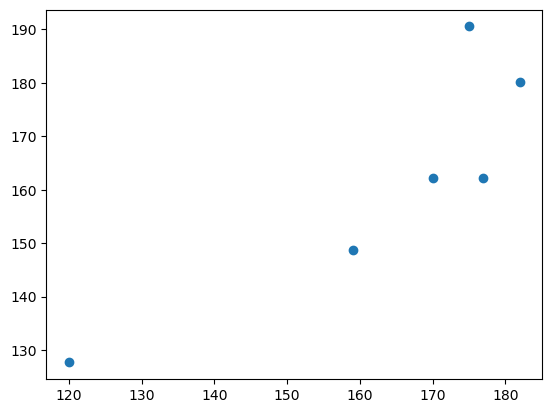

In [22]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred)
plt.show()

In [23]:
## Residuals
residuals=y_test-y_pred
residuals

15    14.735003
9      7.735003
0     -7.683471
8      1.920277
17    10.358028
12   -15.558973
Name: Height, dtype: float64

C:\Users\princ\AppData\Local\Temp\ipykernel_23456\1454134060.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


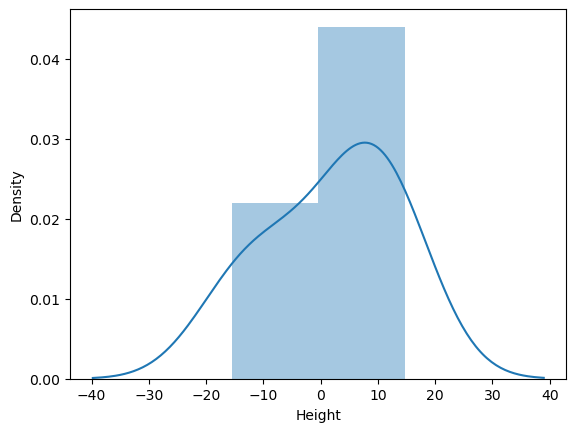

In [24]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)
plt.show()

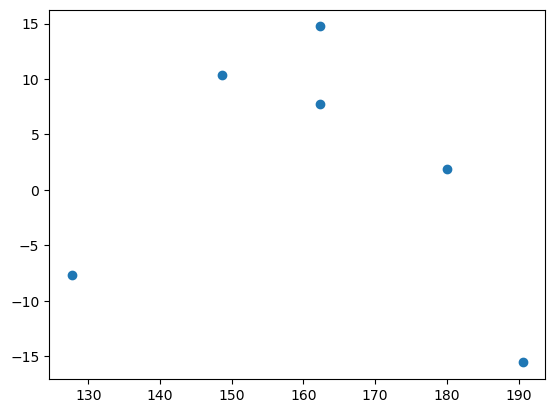

In [25]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred,residuals)
plt.show()